In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
data=pd.read_csv('1.01.+Simple+linear+regression.csv')

In [5]:
data.head()
#SAT score is feature and GPA is Target

SAT   GPA
0  1714  2.40
1  1664  2.52
2  1760  2.54
3  1685  2.74
4  1693  2.83

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SAT     84 non-null     int64  
 1   GPA     84 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.4 KB


In [7]:
data.describe()

SAT        GPA
count    84.000000  84.000000
mean   1845.273810   3.330238
std     104.530661   0.271617
min    1634.000000   2.400000
25%    1772.000000   3.190000
50%    1846.000000   3.380000
75%    1934.000000   3.502500
max    2050.000000   3.810000

In [8]:
data[data.duplicated()]

SAT  GPA
7  1764  3.0

In [9]:
data[data.SAT==1764]

SAT  GPA
6  1764  3.0
7  1764  3.0

<Axes: ylabel='Frequency'>

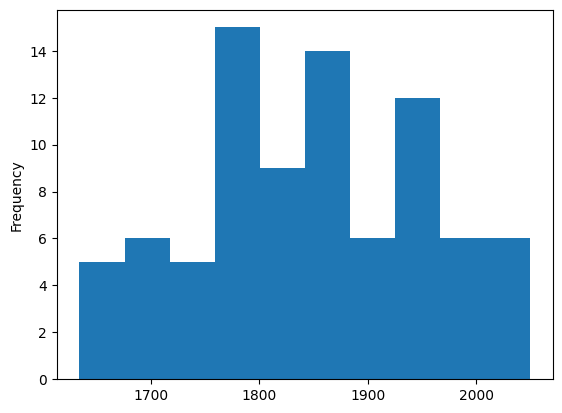

In [10]:
data.SAT.plot(kind='hist')

<ipython-input-11-b2a132efb34a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.SAT)


<Axes: xlabel='SAT', ylabel='Density'>

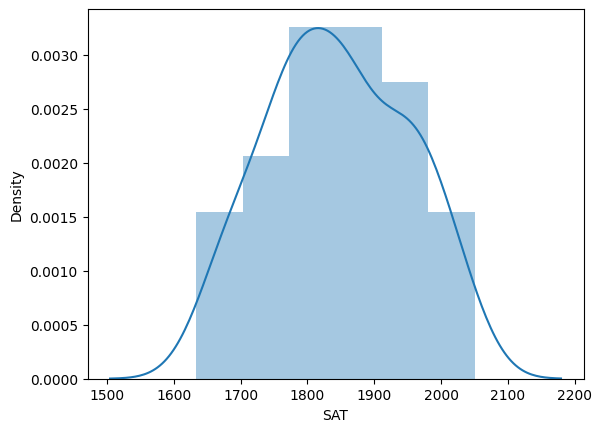

In [11]:
sns.distplot(data.SAT)

In [12]:
data.drop_duplicates(inplace=True)

In [13]:
data

SAT   GPA
0   1714  2.40
1   1664  2.52
2   1760  2.54
3   1685  2.74
4   1693  2.83
..   ...   ...
79  1936  3.71
80  1810  3.71
81  1987  3.73
82  1962  3.76
83  2050  3.81

[83 rows x 2 columns]

<Axes: xlabel='SAT', ylabel='GPA'>

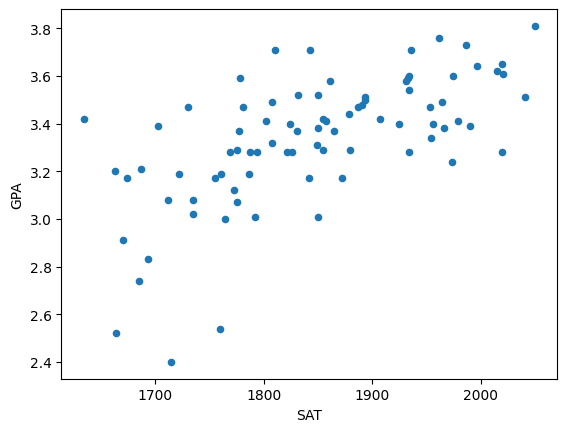

In [14]:
data.plot('SAT','GPA',kind='scatter')

<Axes: xlabel='GPA', ylabel='SAT'>

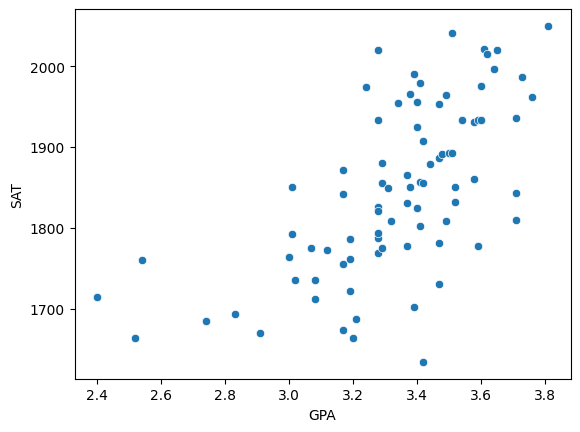

In [15]:
sns.scatterplot(x=data.GPA,y=data.SAT)

# New Section
## Machine learning model starts here

In [16]:
#Divide the columns into y and x
#Features are always taken as X
#Target is always taken as Y


In [17]:
y=data['GPA']
X=data['SAT']

In [18]:
y=data['GPA']

In [19]:
import statsmodels.api as sm

In [20]:
ols=sm.OLS(y,X)
#Ordinary Least Square=OLS
#Created the object ols of the model

In [21]:
model=ols.fit()

In [22]:
model.summary()
#GPA=0.018*SAT+0
#GPA=Y
#0.0018 is coef
# SAT=X
# 0=intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    GPA   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          2.093e+04
Date:                Sat, 09 Sep 2023   Prob (F-statistic):                   1.53e-100
Time:                        12:37:49   Log-Likelihood:                          12.180
No. Observations:                  83   AIC:                                     -22.36
Df Residuals:                      82   BIC:                                     -19.94
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SAT            0.0018   1.25e-05    144.688      0.000       0.002       0.002
==============================================================================
Omnibus:                       10.370   Durbin-Watson:                   1.128
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               12.189
Skew:                          -0.621   Prob(JB):                      0.00226
Kurtosis:                       4.407   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
data.SAT[0],data.GPA[0]
# Lets say this is my value and check what my model says

(1714, 2.4)

In [24]:
# if model pridicts->
0.0018*1714
# this value!=2.4 which was expected value

3.0852

In [25]:
#Now add an intercept
sm.add_constant(X)
#As the constant column is 1 in every place so the model wouldnt depend on this feature


const   SAT
0     1.0  1714
1     1.0  1664
2     1.0  1760
3     1.0  1685
4     1.0  1693
..    ...   ...
79    1.0  1936
80    1.0  1810
81    1.0  1987
82    1.0  1962
83    1.0  2050

[83 rows x 2 columns]

In [26]:
X=sm.add_constant(X)

In [27]:
ols=sm.OLS(y,X)

In [28]:
model=ols.fit()

In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     54.36
Date:                Sat, 09 Sep 2023   Prob (F-statistic):           1.27e-10
Time:                        12:37:49   Log-Likelihood:                 12.472
No. Observations:                  83   AIC:                            -20.94
Df Residuals:                      81   BIC:                            -16.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3104      0.411      0.756      0.452      -0.507       1.128
SAT            0.0016      0.000      7.373      0.000       0.001       0.002
==============================================================================
Omnibus:                       13.910   Durbin-Watson:                   0.940
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.026
Skew:                          -0.769   Prob(JB):                     0.000122
Kurtosis:                       4.687   Cond. No.                     3.28e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
0.0016*1714+0.3104

3.0528

In [31]:
#now if we dont want to do extra process
import statsmodels.formula.api as smf

In [32]:
ols=smf.ols('y~X',data=data)

In [33]:
model2=ols.fit()

In [34]:
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     54.36
Date:                Sat, 09 Sep 2023   Prob (F-statistic):           1.27e-10
Time:                        12:37:49   Log-Likelihood:                 12.472
No. Observations:                  83   AIC:                            -20.94
Df Residuals:                      81   BIC:                            -16.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1552      0.205      0.756      0.452      -0.253       0.564
X[0]           0.1552      0.205      0.756      0.452      -0.253       0.564
X[1]           0.0016      0.000      7.373      0.000       0.001       0.002
==============================================================================
Omnibus:                       13.910   Durbin-Watson:                   0.940
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.026
Skew:                          -0.769   Prob(JB):                     0.000122
Kurtosis:                       4.687   Cond. No.                     2.36e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.1e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [35]:
# P>[t]-> Feature importance, if the value is >0.05 then the feature is not contributing towards the target

In [36]:
model2.params

Intercept    0.155203
X[0]         0.155203
X[1]         0.001638
dtype: float64

In [37]:
model2.pvalues

Intercept    4.520484e-01
X[0]         4.520484e-01
X[1]         1.274516e-10
dtype: float64

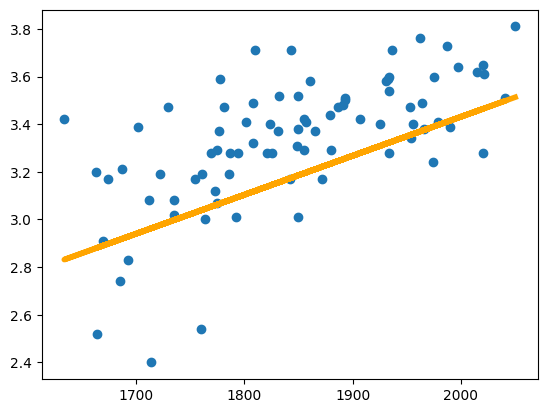

In [38]:
#Create a scatteplot
plt.scatter(data.SAT,data.GPA)
# Define regression problem,taken from model2.params
Y=0.001638*data.SAT+0.155203
plt.plot(data.SAT,Y,lw=4,c='orange',label='regression_line')
#this line is not accurate enough because 1st their are outliers in GPA

In [39]:
#Now prediction, lets take a value and print the value
DATA=data[data.GPA>2.6]

In [40]:
#For 1760 SAT score, what will be the GPA predicted by model
y=DATA['GPA']
x=DATA['SAT']

In [41]:
ols=smf.ols('y~x',data=DATA)

In [42]:
model3=ols.fit()

In [43]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     51.44
Date:                Sat, 09 Sep 2023   Prob (F-statistic):           3.70e-10
Time:                        12:37:50   Log-Likelihood:                 28.988
No. Observations:                  80   AIC:                            -53.98
Df Residuals:                      78   BIC:                            -49.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8952      0.345      2.594      0.011       0.208       1.582
x              0.0013      0.000      7.172      0.000       0.001       0.002
==============================================================================
Omnibus:                        0.029   Durbin-Watson:                   0.946
Prob(Omnibus):                  0.986   Jarque-Bera (JB):                0.120
Skew:                          -0.043   Prob(JB):                        0.942
Kurtosis:                       2.831   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

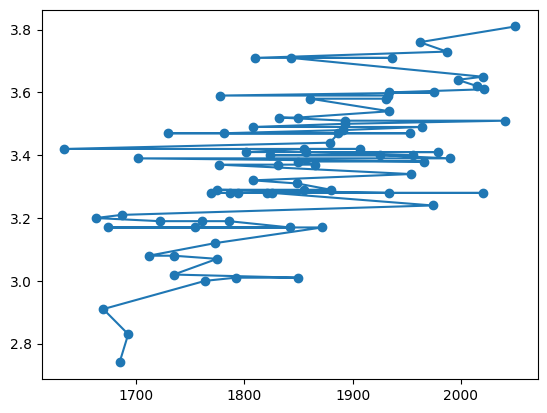

In [44]:

plt.scatter(x,y)
Y=0.0013*x+0.8952
plt.plot(DATA['SAT'],y)

<Axes: xlabel='SAT', ylabel='GPA'>

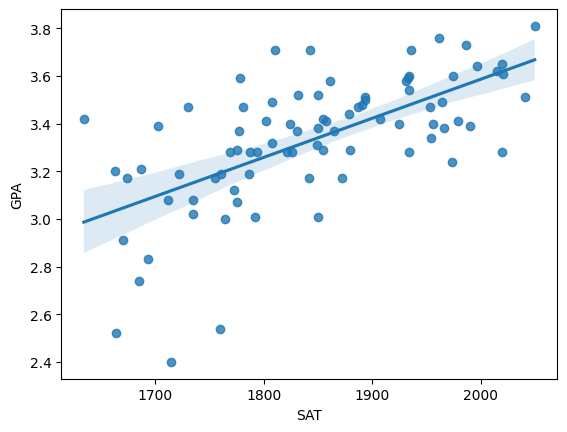

In [45]:
sns.regplot(x="SAT",y="GPA",data=data)

In [46]:
model3.predict({'x':1714})

0    3.182801
dtype: float64

In [ ]:
model3.predict('SAT')

In [46]:
model3.predict